In [1]:
import numpy as np
import scipy as sp
from numpy import linalg as nla
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors

In [2]:
k=0.4032
c=2.3952
p=0.3224
d=0.225423
def model(r,tc):
    x=r[0]
    y=r[1]
    z=r[2]
    a=7.3939+0.002*np.sin(1.8*tc)
    xb=1.0*(p*d*(x*x-a*x)+x*(x+y+c-c*np.tanh(x+z)))
    yb=-1.0*p*d*(a*y+x*x)
    zb=d*(k-z-0.5*x)
    return (np.array([xb,yb,zb]))

In [3]:
def jac(r,tc):
    x=r[0]
    y=r[1]
    z=r[2]
    M=np.array([[-c*np.tanh(x + z) + c + d*p*((-7.3939+0.002*np.sin(1.8*tc)) + 2*x) + x*(-c*(1 - np.tanh(x + z)**2) + 1) + x + y,x,-c*x*(1 - np.tanh(x + z)**2)],
                [-2*x*p*d,-p*d*(7.3939+0.002*np.sin(1.8*tc)),0],
                [-d*0.5,0,-d]])
    return M

In [4]:
def mul(r,tc,g):
    res=np.matmul(jac(r,tc),g)
    return res

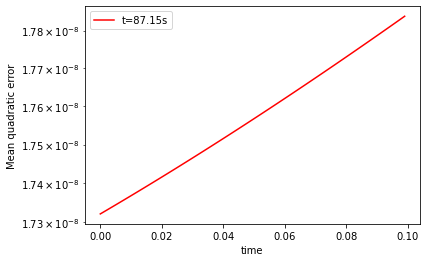

In [5]:
t1t=87.15
tmax1t=t1t+20
ht=0.001
x1t=-2.4632393636886345
y1t=-0.8278899266995253
z1t=1.6432010227294602
r1t=np.array([x1t,y1t,z1t])
valx1t=[x1t]
valy1t=[y1t]
valz1t=[z1t]
h0t=0
valh1t=[h0t]
while (t1t<tmax1t):
    tct=t1t
    k1t=model(r1t,tct)
    k2t=model(r1t+0.5*ht*k1t,tct)
    k3t=model(r1t+0.5*ht*k2t,tct)
    k4t=model(r1t+k3t*ht,tct)
    
    r1t=r1t+(1.0/6)*ht*(k1t+2*k2t+2*k3t+k4t)
    valx1t.append(r1t[0])
    valy1t.append(r1t[1])
    valz1t.append(r1t[2])
    h0t=h0t+ht
    valh1t.append(h0t)
    t1t=t1t+ht

t1=87.15
h=0.001
tmax1=t1+20
x1=-2.4632393636886345
y1=-0.8278899266995253
z1=1.6432010227294602
xi1=x1+1e-8
yi1=y1+1e-8
zi1=z1+1e-8
valx1=[xi1]
valy1=[yi1]
valz1=[zi1]
r1=np.array([xi1,yi1,zi1])
h0=0
valh1=[h0]
while (t1<tmax1):
    tc=t1
    k1=model(r1,tc)
    k2=model(r1+0.5*h*k1,tc)
    k3=model(r1+0.5*h*k2,tc)
    k4=model(r1+k3*h,tc)
    
    r1=r1+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx1.append(r1[0])
    valy1.append(r1[1])
    valz1.append(r1[2])
    h0=h0+h
    valh1.append(h0)
    t1=t1+h
l1=len(valh1)
arrayerr=np.zeros(len(valh1))
for t in range(l1):
    errsq=(valx1t[t]-valx1[t])**2+(valy1t[t]-valy1[t])**2+(valz1t[t]-valz1[t])**2
    sqrt=np.sqrt(errsq)
    arrayerr[t]=sqrt


fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)
plt.plot(valh1[0:100], arrayerr[0:100],'r-',label='t=87.15s')
plt.xlabel('time')
plt.ylabel('Mean quadratic error')
ax.set_yscale('log')
plt.legend()

plt.show()


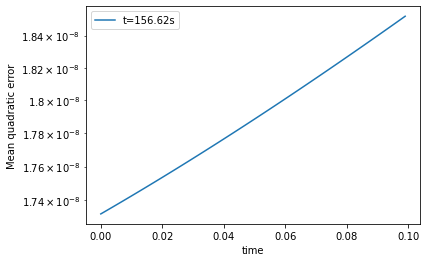

In [6]:
h=0.001
t2=156.62
tmax2=t2+20
x2=-2.3114547224366344
y2=-0.7654090862603016
z2=1.6184734318881504
r2t=np.array([x2,y2,z2])
valx2t=[x2]
valy2t=[y2]
valz2t=[z2]
h0=0
valh=[h0]
while (t2<tmax2):
    tc=t2
    k1=model(r2t,tc)
    k2=model(r2t+0.5*h*k1,tc)
    k3=model(r2t+0.5*h*k2,tc)
    k4=model(r2t+k3*h,tc)
    
    r2t=r2t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx2t.append(r2t[0])
    valy2t.append(r2t[1])
    valz2t.append(r2t[2])
    h0=h0+h
    valh.append(h0)
    t2=t2+h
t2=156.62
tmax2=t2+20
xi2=x2+1e-8
yi2=y2+1e-8
zi2=z2+1e-8
valx2=[xi2]
valy2=[yi2]
valz2=[zi2]
r2=np.array([xi2,yi2,zi2])
h0=0
valh=[h0]
while (t2<tmax2):
    tc=t2
    k1=model(r2,tc)
    k2=model(r2+0.5*h*k1,tc)
    k3=model(r2+0.5*h*k2,tc)
    k4=model(r2+k3*h,tc)
    
    r2=r2+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx2.append(r2[0])
    valy2.append(r2[1])
    valz2.append(r2[2])
    h0=h0+h
    valh.append(h0)
    t2=t2+h

l=len(valh)   
arrayerr2=np.zeros(len(valh))
for t in range(l):
    errsq2=(valx2t[t]-valx2[t])**2+(valy2t[t]-valy2[t])**2+(valz2t[t]-valz2[t])**2
    sqrt2=np.sqrt(errsq2)
    arrayerr2[t]=sqrt2


fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
plt.plot(valh[0:100], arrayerr2[0:100],label='t=156.62s')
plt.xlabel('time')
plt.ylabel('Mean quadratic error')
ax2.set_yscale('log')
plt.legend()

plt.show()


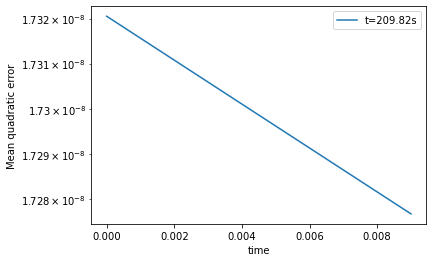

In [7]:
h=0.001
t3=209.82
tmax3=t3+20
x3=-0.5032618102223279
y3=-0.24346658976254046
z3=1.2499079842422562
r3t=np.array([x3,y3,z3])
valx3t=[x3]
valy3t=[y3]
valz3t=[z3]
h0=0
valh=[h0]
while (t3<tmax3):
    tc=t3
    k1=model(r3t,tc)
    k2=model(r3t+0.5*h*k1,tc)
    k3=model(r3t+0.5*h*k2,tc)
    k4=model(r3t+k3*h,tc)
    
    r3t=r3t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx3t.append(r3t[0])
    valy3t.append(r3t[1])
    valz3t.append(r3t[2])
    h0=h0+h
    valh.append(h0)
    t3=t3+h
t3=209.82
tmax3=t3+20
xi3=x3+1e-8
yi3=y3+1e-8
zi3=z3+1e-8
valx3=[xi3]
valy3=[yi3]
valz3=[zi3]
r3=np.array([xi3,yi3,zi3])
h0=0
valh=[h0]
while (t3<tmax3):
    tc=t3
    k1=model(r3,tc)
    k2=model(r3+0.5*h*k1,tc)
    k3=model(r3+0.5*h*k2,tc)
    k4=model(r3+k3*h,tc)
    
    r3=r3+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx3.append(r3[0])
    valy3.append(r3[1])
    valz3.append(r3[2])
    h0=h0+h
    valh.append(h0)
    t3=t3+h

arrayerr3=np.zeros(len(valh))
for t in range(l):
    errsq3=(valx3t[t]-valx3[t])**2+(valy3t[t]-valy3[t])**2+(valz3t[t]-valz3[t])**2
    sqrt3=np.sqrt(errsq3)
    arrayerr3[t]=sqrt3


fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
plt.xlabel('time')
plt.ylabel('Mean quadratic error')
plt.plot(valh[0:10], arrayerr3[0:10],label='t=209.82s')
ax3.set_yscale('log')
plt.legend()

plt.show()

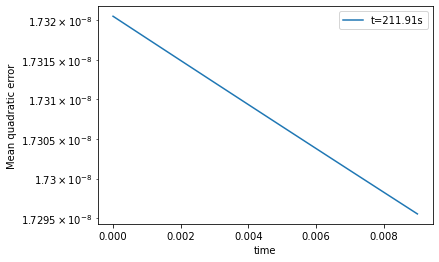

In [8]:
h=0.001
t4=211.91
tmax4=t4+20
x4=-0.3236937249460866
y4=-0.09173217585075805
z4=1.0022915245785422
r4t=np.array([x4,y4,z4])
valx4t=[x4]
valy4t=[y4]
valz4t=[z4]
h0=0
valh=[h0]
while (t4<tmax4):
    tc=t4
    k1=model(r4t,tc)
    k2=model(r4t+0.5*h*k1,tc)
    k3=model(r4t+0.5*h*k2,tc)
    k4=model(r4t+k3*h,tc)
    
    r4t=r4t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx4t.append(r4t[0])
    valy4t.append(r4t[1])
    valz4t.append(r4t[2])
    h0=h0+h
    valh.append(h0)
    t4=t4+h
t4=211.91
tmax4=t4+20
xi4=x4+1e-8
yi4=y4+1e-8
zi4=z4+1e-8
valx4=[xi4]
valy4=[yi4]
valz4=[zi4]
r4=np.array([xi4,yi4,zi4])
h0=0
valh=[h0]
while (t4<tmax4):
    tc=t4
    k1=model(r4,tc)
    k2=model(r4+0.5*h*k1,tc)
    k3=model(r4+0.5*h*k2,tc)
    k4=model(r4+k3*h,tc)
    
    r4=r4+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx4.append(r4[0])
    valy4.append(r4[1])
    valz4.append(r4[2])
    h0=h0+h
    valh.append(h0)
    t4=t4+h

arrayerr4=np.zeros(len(valh))
for t in range(l):
    errsq4=(valx4t[t]-valx4[t])**2+(valy4t[t]-valy4[t])**2+(valz4t[t]-valz4[t])**2
    sqrt4=np.sqrt(errsq4)
    arrayerr4[t]=sqrt4


fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)
plt.xlabel('time')
plt.ylabel('Mean quadratic error')
plt.plot(valh[0:10], arrayerr4[0:10],label='t=211.91s')
ax4.set_yscale('log')
plt.legend()

plt.show()

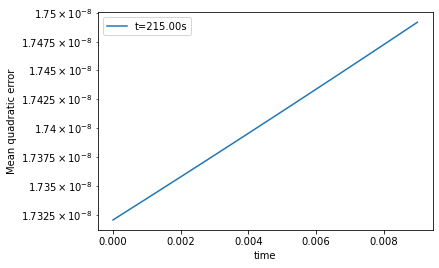

In [9]:
h=0.001
t5=215
tmax5=t5+20
x5=-1.1383232841916238 
y5=-0.06064051282549149 
z5=0.8351242362731193
r5t=np.array([x5,y5,z5])
valx5t=[x5]
valy5t=[y5]
valz5t=[z5]
h0=0
valh=[h0]
while (t5<tmax5):
    tc=t5
    k1=model(r5t,tc)
    k2=model(r5t+0.5*h*k1,tc)
    k3=model(r5t+0.5*h*k2,tc)
    k4=model(r5t+k3*h,tc)
    
    r5t=r5t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx5t.append(r5t[0])
    valy5t.append(r5t[1])
    valz5t.append(r5t[2])
    h0=h0+h
    valh.append(h0)
    t5=t5+h
t5=215
tmax5=t5+20
xi5=x5+1e-8
yi5=y5+1e-8
zi5=z5+1e-8
valx5=[xi5]
valy5=[yi5]
valz5=[zi5]
r5=np.array([xi5,yi5,zi5])
h0=0
valh=[h0]
while (t5<tmax5):
    tc=t5
    k1=model(r5,tc)
    k2=model(r5+0.5*h*k1,tc)
    k3=model(r5+0.5*h*k2,tc)
    k4=model(r5+k3*h,tc)
    
    r5=r5+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx5.append(r5[0])
    valy5.append(r5[1])
    valz5.append(r5[2])
    h0=h0+h
    valh.append(h0)
    t5=t5+h

arrayerr5=np.zeros(len(valh))
for t in range(l):
    errsq5=(valx5t[t]-valx5[t])**2+(valy5t[t]-valy5[t])**2+(valz5t[t]-valz5[t])**2
    sqrt5=np.sqrt(errsq5)
    arrayerr5[t]=sqrt5


fig5 = plt.figure()
ax5 = fig5.add_subplot(1, 1, 1)
plt.xlabel('time')
plt.ylabel('Mean quadratic error')
plt.plot(valh[0:10], arrayerr5[0:10],label='t=215.00s')
ax5.set_yscale('log')
plt.legend()

plt.show()


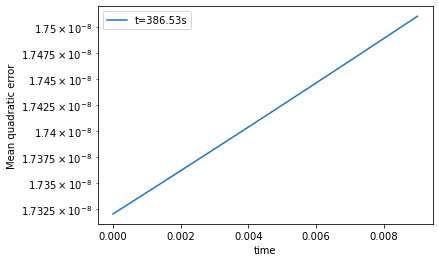

In [10]:
h=0.001
t6=386.53
tmax6=t6+20
x6=-1.902085458186659  
y6=-0.6682481521786103
z6=1.5719064219604757
r6t=np.array([x6,y6,z6])
valx6t=[x6]
valy6t=[y6]
valz6t=[z6]
h0=0
valh=[h0]
while (t6<tmax6):
    tc=t6
    k1=model(r6t,tc)
    k2=model(r6t+0.5*h*k1,tc)
    k3=model(r6t+0.5*h*k2,tc)
    k4=model(r6t+k3*h,tc)
    
    r6t=r6t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx6t.append(r6t[0])
    valy6t.append(r6t[1])
    valz6t.append(r6t[2])
    h0=h0+h
    valh.append(h0)
    t6=t6+h
t6=386.53
tmax6=t6+20
xi6=x6+1e-8
yi6=y6+1e-8
zi6=z6+1e-8
valx6=[xi6]
valy6=[yi6]
valz6=[zi6]
r6=np.array([xi6,yi6,zi6])
h0=0
valh=[h0]
while (t6<tmax6):
    tc=t6
    k1=model(r6,tc)
    k2=model(r6+0.5*h*k1,tc)
    k3=model(r6+0.5*h*k2,tc)
    k4=model(r6+k3*h,tc)
    
    r6=r6+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx6.append(r6[0])
    valy6.append(r6[1])
    valz6.append(r6[2])
    h0=h0+h
    valh.append(h0)
    t6=t6+h

arrayerr6=np.zeros(len(valh))
for t in range(l):
    errsq6=(valx6t[t]-valx6[t])**2+(valy6t[t]-valy6[t])**2+(valz6t[t]-valz6[t])**2
    sqrt6=np.sqrt(errsq6)
    arrayerr6[t]=sqrt6


fig6 = plt.figure()
ax6 = fig6.add_subplot(1, 1, 1)
plt.xlabel('time')
plt.ylabel('Mean quadratic error')
plt.plot(valh[0:10], arrayerr6[0:10],label='t=386.53s')
ax6.set_yscale('log')
plt.legend()

plt.show()

In [17]:
h=0.001
t7=389.33
tmax7=t7+20
x7=-2.828246654147495
y7=-0.6378069202627101
z7=1.5069025003586884
r7t=np.array([x7,y7,z7])
valx7t=[x7]
valy7t=[y7]
valz7t=[z7]
h0=0
valh=[h0]
while (t7<tmax7):
    tc=t7
    k1=model(r7t,tc)
    k2=model(r7t+0.5*h*k1,tc)
    k3=model(r7t+0.5*h*k2,tc)
    k4=model(r7t+k3*h,tc)
    
    r7t=r7t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx7t.append(r7t[0])
    valy7t.append(r7t[1])
    valz7t.append(r7t[2])
    h0=h0+h
    valh.append(h0)
    t7=t7+h
t7=389.33
tmax7=t7+20
xi7=x7+1e-8
yi7=y7+1e-8
zi7=z7+1e-8
valx7=[xi7]
valy7=[yi7]
valz7=[zi7]
r7=np.array([xi7,yi7,zi7])
h0=0
valh=[h0]
while (t7<tmax7):
    tc=t7
    k1=model(r7,tc)
    k2=model(r7+0.5*h*k1,tc)
    k3=model(r7+0.5*h*k2,tc)
    k4=model(r7+k3*h,tc)
    
    r7=r7+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx7.append(r7[0])
    valy7.append(r7[1])
    valz7.append(r7[2])
    h0=h0+h
    valh.append(h0)
    t7=t7+h

arrayerr7=np.zeros(len(valh))
for t in range(l):
    errsq7=(valx7t[t]-valx7[t])**2+(valy7t[t]-valy7[t])**2+(valz7t[t]-valz7[t])**2
    sqrt7=np.sqrt(errsq7)
    arrayerr7[t]=sqrt7




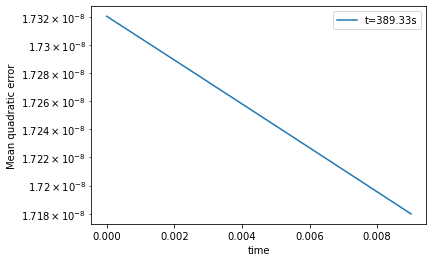

In [19]:
fig7 = plt.figure()
ax7 = fig7.add_subplot(1, 1, 1)
plt.xlabel('time')
plt.ylabel('Mean quadratic error')
plt.plot(valh[0:10], arrayerr7[0:10],label='t=389.33s')
ax7.set_yscale('log')
plt.legend()

plt.show()

In [25]:
h=0.001
t8=176.40
tmax8=t8+20
x8=-1.9820939069179084
y8=-0.7152379967835283
z8=1.5944366474577152
r8t=np.array([x8,y8,z8])
valx8t=[x8]
valy8t=[y8]
valz8t=[z8]
h0=0
valh=[h0]
while (t8<tmax8):
    tc=t8
    k1=model(r8t,tc)
    k2=model(r8t+0.5*h*k1,tc)
    k3=model(r8t+0.5*h*k2,tc)
    k4=model(r8t+k3*h,tc)
    
    r8t=r8t+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx8t.append(r8t[0])
    valy8t.append(r8t[1])
    valz8t.append(r8t[2])
    h0=h0+h
    valh.append(h0)
    t8=t8+h
t8=176.40
tmax8=t8+20
xi8=x8+1e-8
yi8=y8+1e-8
zi8=z8+1e-8
valx8=[xi8]
valy8=[yi8]
valz8=[zi8]
r8=np.array([xi8,yi8,zi8])
h0=0
valh=[h0]
while (t8<tmax8):
    tc=t8
    k1=model(r8,tc)
    k2=model(r8+0.5*h*k1,tc)
    k3=model(r8+0.5*h*k2,tc)
    k4=model(r8+k3*h,tc)
    
    r8=r8+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx8.append(r8[0])
    valy8.append(r8[1])
    valz8.append(r8[2])
    h0=h0+h
    valh.append(h0)
    t8=t8+h

arrayerr8=np.zeros(len(valh))
for t in range(l):
    errsq8=(valx8t[t]-valx8[t])**2+(valy8t[t]-valy8[t])**2+(valz8t[t]-valz8[t])**2
    sqrt8=np.sqrt(errsq8)
    arrayerr8[t]=sqrt8


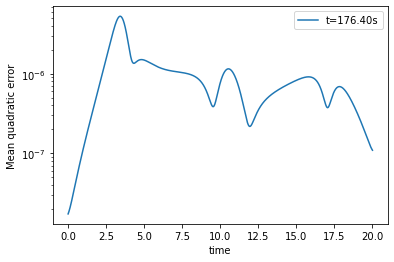

In [27]:
fig9 = plt.figure()
ax9 = fig9.add_subplot(1, 1, 1)
plt.xlabel('time')
plt.ylabel('Mean quadratic error')
plt.plot(valh, arrayerr8,label='t=176.40s')
ax9.set_yscale('log')
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


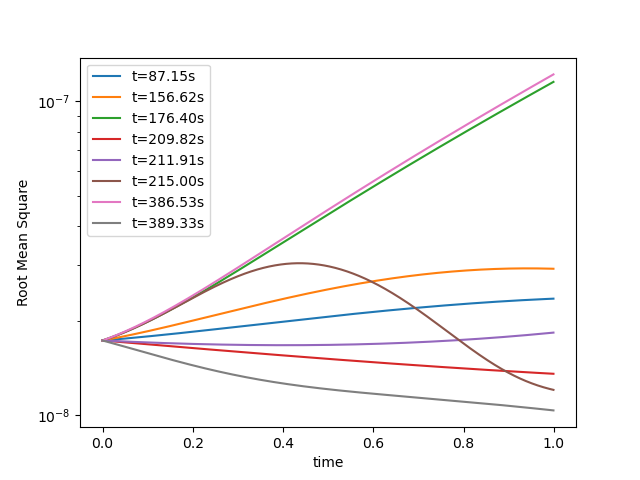

In [29]:
%matplotlib notebook
fig8 = plt.figure()
ax8 = fig8.add_subplot(1, 1, 1)
plt.xlabel('time')
plt.ylabel('Root Mean Square')
plt.plot(valh1[0:1000], arrayerr[0:1000],label='t=87.15s')
plt.plot(valh[0:1000], arrayerr2[0:1000],label='t=156.62s')
plt.plot(valh[0:1000], arrayerr8[0:1000],label='t=176.40s')
plt.plot(valh[0:1000], arrayerr3[0:1000],label='t=209.82s')
plt.plot(valh[0:1000], arrayerr4[0:1000],label='t=211.91s')
plt.plot(valh[0:1000], arrayerr5[0:1000],label='t=215.00s')
plt.plot(valh[0:1000], arrayerr6[0:1000],label='t=386.53s')
plt.plot(valh[0:1000], arrayerr7[0:1000],label='t=389.33s')
ax8.set_yscale('log')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


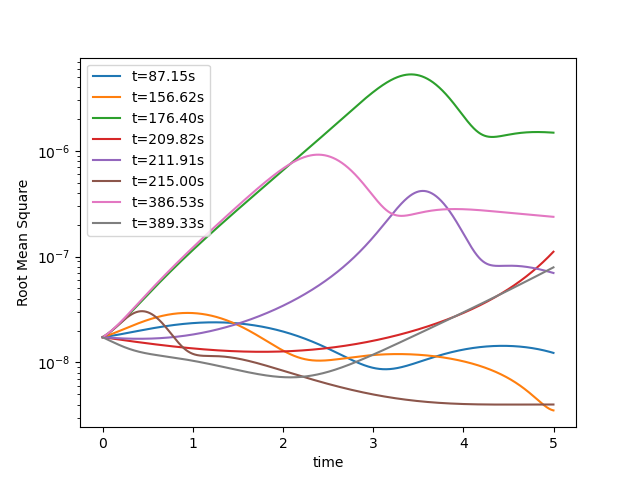

In [31]:
%matplotlib notebook
fig10 = plt.figure()
ax10 = fig10.add_subplot(1, 1, 1)
plt.xlabel('time')
plt.ylabel('Root Mean Square')
plt.plot(valh1[0:5000], arrayerr[0:5000],label='t=87.15s')
plt.plot(valh[0:5000], arrayerr2[0:5000],label='t=156.62s')
plt.plot(valh[0:5000], arrayerr8[0:5000],label='t=176.40s')
plt.plot(valh[0:5000], arrayerr3[0:5000],label='t=209.82s')
plt.plot(valh[0:5000], arrayerr4[0:5000],label='t=211.91s')
plt.plot(valh[0:5000], arrayerr5[0:5000],label='t=215.00s')
plt.plot(valh[0:5000], arrayerr6[0:5000],label='t=386.53s')
plt.plot(valh[0:5000], arrayerr7[0:5000],label='t=389.33s')
ax10.set_yscale('log')
plt.legend()
plt.show()